In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
feature = [ 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar', 'P', 'T']
input_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Skoltech/Research/Hydrogen Oxidation/input_197.txt', names= feature, sep = ' ')
input_df.head()

,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar,P,T
0,0.258059,0.076098,0.079991,0.406154,0.050154,0.129445,0.000035,0.000065,0.0,0.0,552392.0,2869.0
1,0.293677,0.061413,0.020633,0.406516,0.049569,0.168074,0.000049,0.000070,0.0,0.0,827180.0,1642.0
2,0.222013,0.064561,0.024385,0.557591,0.053823,0.077461,0.000095,0.000071,0.0,0.0,355080.0,2119.0
3,0.251337,0.044486,0.057282,0.414791,0.036133,0.195898,0.000011,0.000062,0.0,0.0,445585.0,2715.0
4,0.345863,0.037831,0.074332,0.318219,0.061714,0.161887,0.000047,0.000106,0.0,0.0,290634.0,1684.0


In [3]:
label_ = [ 't', 'T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar']
out_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Skoltech/Research/Hydrogen Oxidation/Out_files_197/out10.txt', sep = ';', names= label_)
out_df.head()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
0,0.000000e+00,2874.00,12.94100,1.84185,3.14553,3.70200,1.28248,11.9938,0.003631,0.002374,0,0
1,1.000000e-07,2772.64,9.45283,3.84474,4.08500,1.87784,1.73944,14.2557,0.000958,0.000004,0,0
2,2.000000e-07,2732.45,9.47493,3.96478,4.14648,1.89679,1.70445,14.1910,0.001122,0.000005,0,0
3,3.000000e-07,2713.50,9.48423,4.02251,4.17499,1.90573,1.68772,14.1612,0.001209,0.000005,0,0
4,4.000000e-07,2703.28,9.48894,4.05394,4.19024,1.91056,1.67863,14.1453,0.001259,0.000005,0,0


In [4]:
len(out_df)

201

In [5]:
#visualization
def data_plot(y_test, header = 'Time series', log = True):
    fig, ax = plt.subplots(3, 3, figsize=(20,15))
    title =  [ 'T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2']
    for i in range(9):
        a = i//3; b= i%3
        ax[a,b].plot(y_test.iloc[:, i])
        ax[a,b].set_title(f'{header} of {title[i]}', fontsize = 15)
        # ax[a,b].set_xlabel('Time step')
        # ax[a,b].set_ylabel('Groundtruth')
        if log and (i == 7 or i == 8):
            ax[a,b].set_yscale('log')
    plt.show()

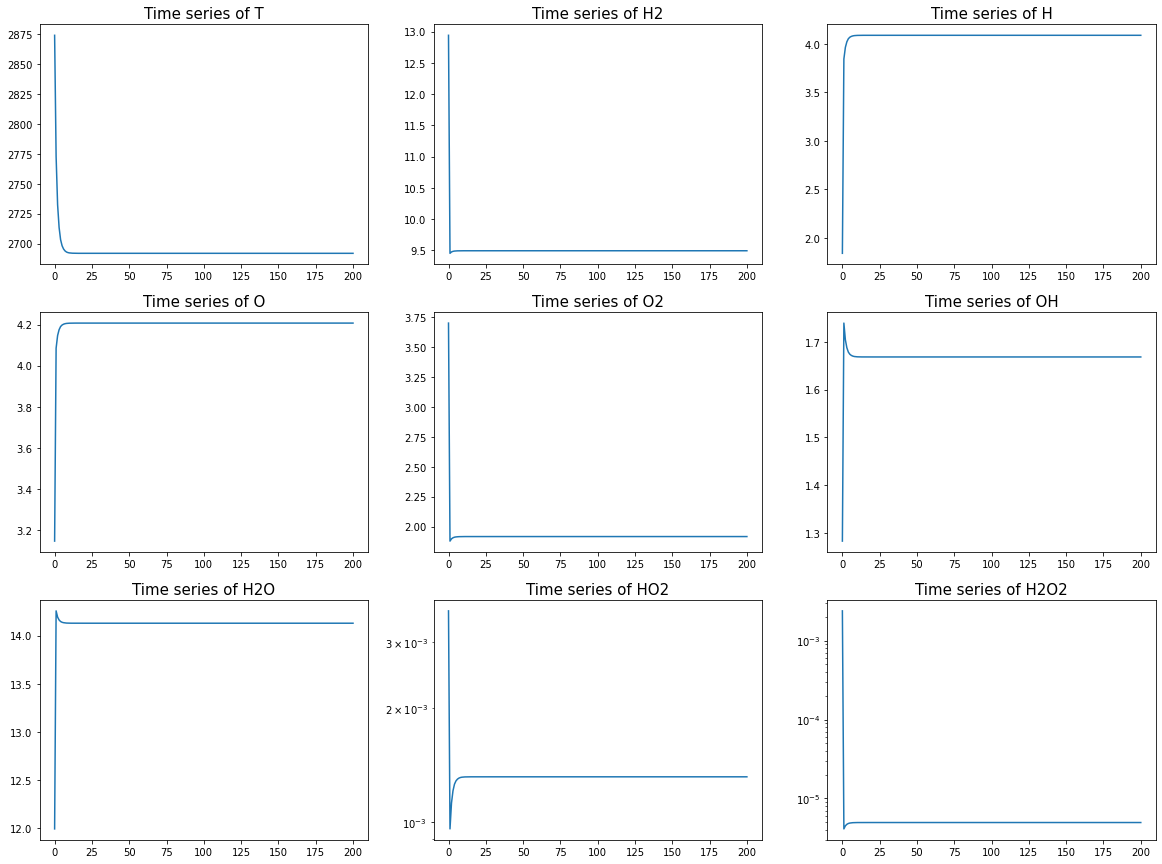

In [6]:
data_plot(out_df.iloc[:, 1: -2])

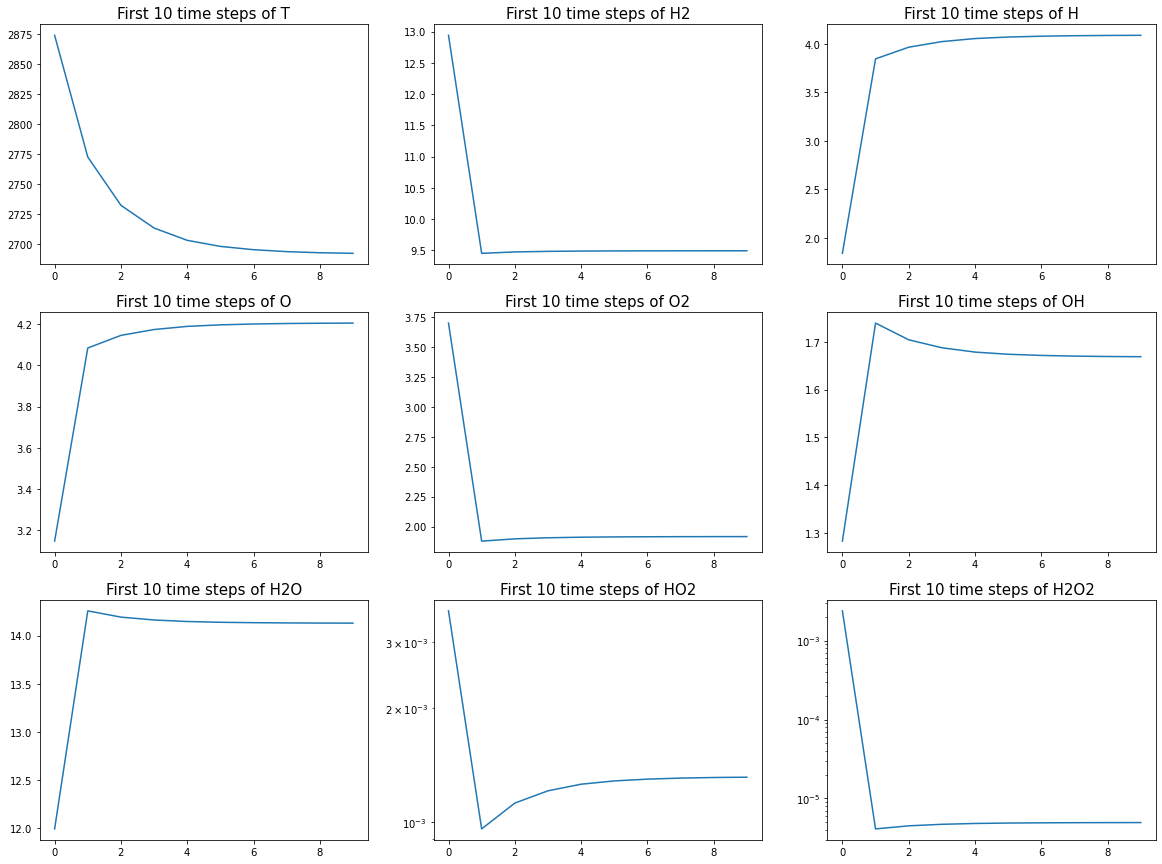

In [7]:
data_plot(out_df.iloc[: 10, 1: -2], 'First 10 time steps')

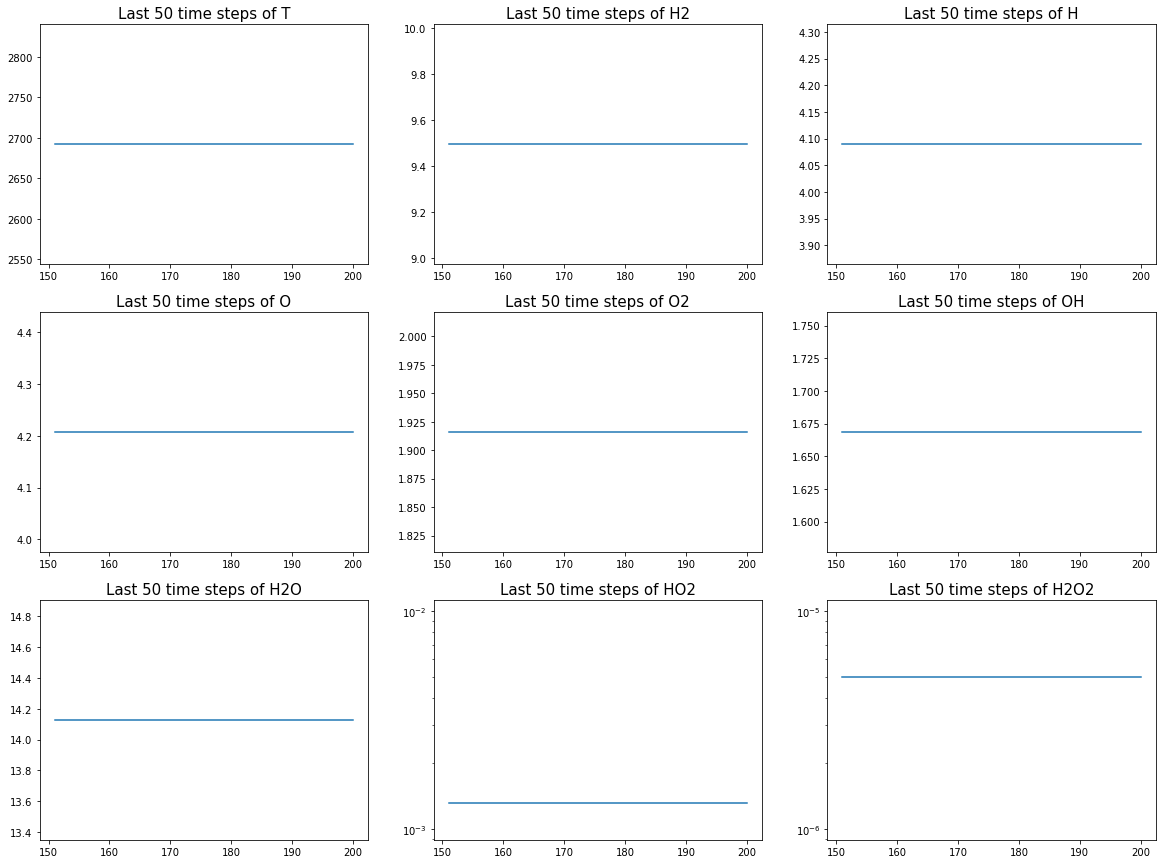

In [8]:
data_plot(out_df.iloc[-50: , 1: -2], 'Last 50 time steps',True)

In [9]:
out_df.iloc[100].t

1e-05

The numerical solutions seems to converge fast; for the classic machine learning base model we consider using a fix timestamp, `t = 1e-5` which is the 100th timestamp. We now create an output matrix for all input sample in the input data.

In [10]:
def make_out_df(path, nsample, idx = 100):
    for i in range(nsample):
        if i == 0:
            df = pd.read_csv(f'{path}/out0.txt', sep = ';', header = None).iloc[idx,:]
        else:
            df_ = pd.read_csv(f'{path}/out{i}.txt', sep = ';', header = None).iloc[idx]

            #concatenate dfs
            df = pd.concat([df,df_], axis= 1)
            
    df =  df.transpose().reset_index(drop = True)
    df.columns = [ 't', 'T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar']
    return df

In [11]:
out_df = make_out_df('/Volumes/GoogleDrive/My Drive/Skoltech/Research/Hydrogen Oxidation/Out_files_98660', 1500)

In [12]:
#check descriptive statistics of target output
out_df.describe()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
count,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.0,1500.0
mean,1.000000e-05,2664.336267,5.876858,2.552080,4.545342,4.702809,1.877123,14.391137,0.001940,8.225280e-06,0.0,0.0
std,2.965604e-19,106.182485,4.033929,1.739025,2.825652,4.321180,1.145755,10.520552,0.001829,8.840736e-06,0.0,0.0
min,1.000000e-05,2199.260000,0.278658,0.169301,0.365102,0.120470,0.175633,0.710648,0.000046,1.349160e-07,0.0,0.0
25%,1.000000e-05,2594.917500,2.853382,1.225045,2.383400,1.762280,0.979129,6.791472,0.000597,2.137965e-06,0.0,0.0
50%,1.000000e-05,2667.810000,5.029285,2.184445,3.941000,3.399020,1.711635,11.584050,0.001447,5.367060e-06,0.0,0.0
75%,1.000000e-05,2737.797500,7.838502,3.405517,6.172817,6.116953,2.544310,19.541375,0.002655,1.098478e-05,0.0,0.0
max,1.000000e-05,2960.190000,29.430600,12.001000,18.069400,32.913400,6.667290,65.071200,0.011481,5.709760e-05,0.0,0.0


In [13]:
feature = [ 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar', 'P', 'T']
in_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Skoltech/Research/Hydrogen Oxidation/input_98660.txt', names= feature, sep = ' ')
in_df.shape

(98660, 12)

In [51]:
in_df.head()

,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar,P,T
0,0.368174,0.093910,0.112445,0.350588,0.069755,0.004942,0.000075,0.000109,0.0,0.0,446946.0,1358.0
1,0.355457,0.110099,0.099196,0.373753,0.048344,0.013026,0.000051,0.000074,0.0,0.0,328390.0,2639.0
2,0.220054,0.065191,0.068056,0.501943,0.022656,0.121913,0.000113,0.000074,0.0,0.0,684968.0,2530.0
3,0.185934,0.075387,0.074535,0.210711,0.039554,0.413686,0.000108,0.000086,0.0,0.0,372979.0,1284.0
4,0.512726,0.076426,0.114203,0.253493,0.033068,0.009927,0.000063,0.000094,0.0,0.0,895314.0,1946.0


In [53]:
X1200 = in_df.iloc[:500]
X1200.to_csv('input_500_complete.txt', sep = ' ', index = False, header = False)
X1200

,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar,P,T
0,0.368174,0.093910,0.112445,0.350588,0.069755,0.004942,0.000075,0.000109,0.0,0.0,446946.0,1358.0
1,0.355457,0.110099,0.099196,0.373753,0.048344,0.013026,0.000051,0.000074,0.0,0.0,328390.0,2639.0
2,0.220054,0.065191,0.068056,0.501943,0.022656,0.121913,0.000113,0.000074,0.0,0.0,684968.0,2530.0
3,0.185934,0.075387,0.074535,0.210711,0.039554,0.413686,0.000108,0.000086,0.0,0.0,372979.0,1284.0
4,0.512726,0.076426,0.114203,0.253493,0.033068,0.009927,0.000063,0.000094,0.0,0.0,895314.0,1946.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.325822,0.098387,0.156018,0.251275,0.075548,0.092854,0.000012,0.000084,0.0,0.0,740456.0,1559.0
496,0.300172,0.056525,0.109753,0.338675,0.058060,0.136519,0.000189,0.000108,0.0,0.0,232640.0,1911.0
497,0.243373,0.057787,0.046400,0.325697,0.033346,0.293310,0.000035,0.000052,0.0,0.0,997387.0,1213.0
498,0.302295,0.052497,0.041005,0.339471,0.024210,0.240434,0.000033,0.000054,0.0,0.0,126592.0,1668.0


## Model fiting
The data has multiple targets which are the `Temperature` and the stoichometric concentration of the components `'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2'.` Note that the concentration of the inert gases are ignored. We need the [Sklearn MultiOutputRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html#sklearn.multioutput.MultiOutputRegressor.score) to handle the multi-target data. In this work, the following models would bw used:
- Linear regression.
- Decision Tree Regressor.
- Random Forest Regressor.
- GradientBoost Regressor.

First, we preprocess (clean, split and transform) the data.

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

In [20]:
#data selection and cleaning
X = in_df.drop(columns = ['N2', 'Ar']).iloc[:1500]
y = out_df.drop(columns = ['t', 'N2', 'Ar'])

#data splitting: 0.2 of data for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

# #data transformations
transform = StandardScaler()
X_train = transform.fit_transform(X_train)
X_test = transform.transform(X_test)

ytransform = StandardScaler()
y_train = ytransform.fit_transform(y_train)
y_test = ytransform.transform(y_test)

In [50]:
X1200 = X.iloc[:1200]
X1200.to_csv('input_1200.txt', sep = ' ', index = False, header = False)
X1200

,H2,H,O,O2,OH,H2O,HO2,H2O2,P,T
0,0.368174,0.093910,0.112445,0.350588,0.069755,0.004942,0.000075,0.000109,446946.0,1358.0
1,0.355457,0.110099,0.099196,0.373753,0.048344,0.013026,0.000051,0.000074,328390.0,2639.0
2,0.220054,0.065191,0.068056,0.501943,0.022656,0.121913,0.000113,0.000074,684968.0,2530.0
3,0.185934,0.075387,0.074535,0.210711,0.039554,0.413686,0.000108,0.000086,372979.0,1284.0
4,0.512726,0.076426,0.114203,0.253493,0.033068,0.009927,0.000063,0.000094,895314.0,1946.0
...,...,...,...,...,...,...,...,...,...,...
1195,0.273126,0.039844,0.050375,0.217771,0.031797,0.387021,0.000002,0.000063,112019.0,2238.0
1196,0.465302,0.104396,0.133997,0.108538,0.092992,0.094604,0.000076,0.000095,185681.0,2035.0
1197,0.504390,0.025121,0.039744,0.225760,0.036183,0.168724,0.000023,0.000055,693009.0,2013.0
1198,0.485474,0.076219,0.091732,0.202049,0.064647,0.079676,0.000122,0.000082,932924.0,1797.0


In [21]:
pd.DataFrame(data = X_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,-2.329618e-16,3.462971e-16,4.144833e-17,1.034820e-16,-1.868875e-17,-3.745152e-16,-7.012909e-17,6.711761e-16,1.461794e-16,4.829470e-17
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.302381e+00,-2.300540e+00,-2.287679e+00,-1.851481e+00,-1.785047e+00,-1.774513e+00,-1.596462e+00,-2.028359e+00,-1.683287e+00,-1.757124e+00
25%,-7.321671e-01,-7.020359e-01,-7.342130e-01,-8.012916e-01,-7.679921e-01,-7.898079e-01,-8.358176e-01,-7.532185e-01,-8.776602e-01,-8.549571e-01
50%,-1.039495e-01,-4.634486e-02,-7.571429e-02,-8.183411e-02,-3.253498e-02,-4.976381e-02,-7.517356e-02,-1.156482e-01,1.292988e-02,3.928037e-02
75%,6.995539e-01,5.926084e-01,6.391950e-01,6.554950e-01,6.485524e-01,7.434336e-01,7.060284e-01,5.750530e-01,8.614271e-01,8.617145e-01
max,3.601284e+00,3.175303e+00,3.315998e+00,4.066296e+00,2.794484e+00,2.795005e+00,4.056974e+00,4.931783e+00,1.760020e+00,1.756393e+00


## Linear Regressor

In [54]:
LR  = LinearRegression() #MultiOutputRegressor(LinearRegression())
LR.fit(X_train, y_train)

print(f'Score on Train data: {LR.score(X_train, y_train)}, \nscore on test data: {LR.score(X_test, y_test)}')

Score on Train data: 0.841008781963901, 
score on test data: 0.8430242359042661


In [55]:
#visualization
def result_plot(y_test, pred):
    fig, ax = plt.subplots(3, 3, figsize=(20,15))
    title =  [ 'T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2']
    for i in range(9):
        a = i//3; b= i%3
        ax[a,b].scatter(pred[:,i], y_test[:,i])
        ax[a,b].plot(np.arange(y_test[:,i].min(), y_test[:,i].max()), 
                     np.arange(y_test[:,i].min(), y_test[:,i].max()), '--k')
        ax[a,b].set_title(title[i])
        ax[a,b].set_xlabel('Prediction')
        ax[a,b].set_ylabel('Groundtruth')
    plt.show()

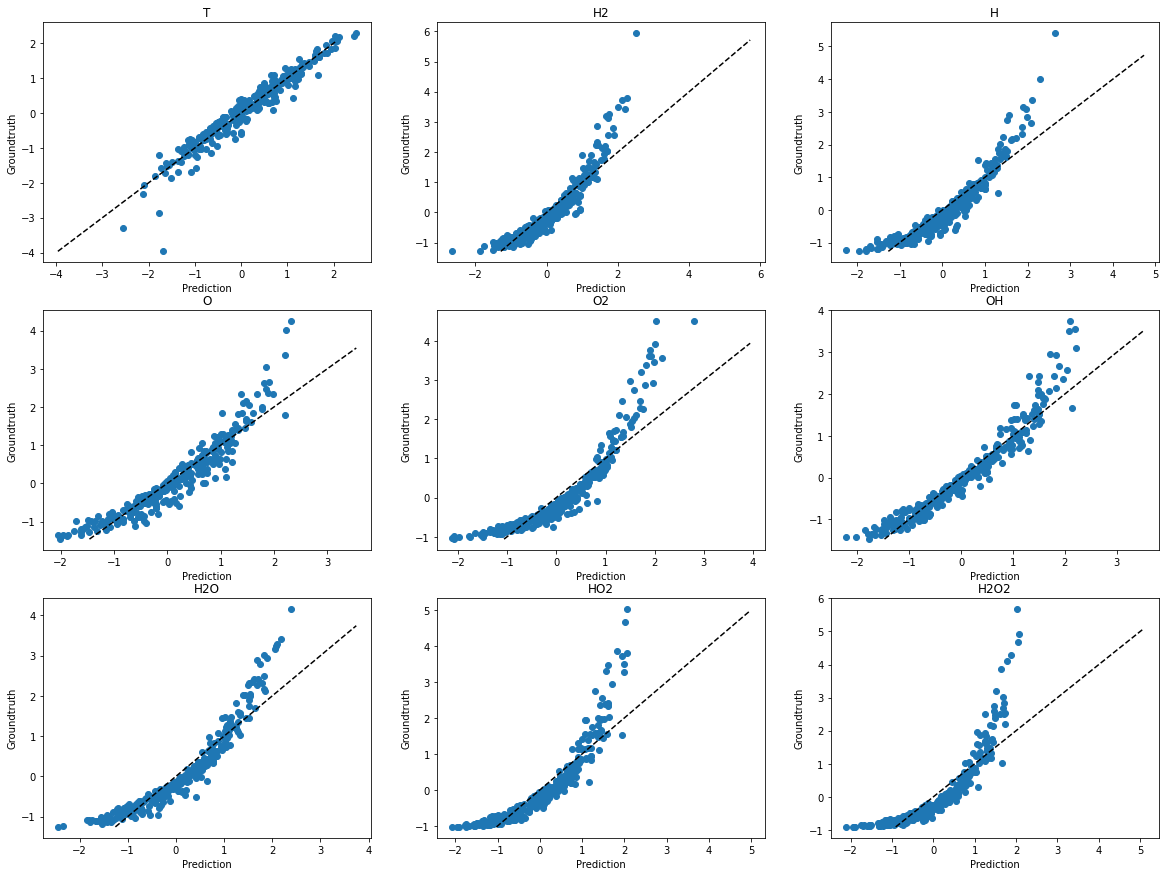

In [56]:
result_plot(y_test, LR.predict(X_test))

## Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {'max_depth':range(5,20), 'max_leaf_nodes': range(100, 1000, 20), 'max_features': range(5, 15)}
DT_regr = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters, n_jobs=-1)
DT_regr.fit(X=X_train, y=y_train)
tree_model = DT_regr.best_estimator_
print (DT_regr.best_score_, DT_regr.best_params_) 

0.8024772701098051 {'max_depth': 10, 'max_features': 10, 'max_leaf_nodes': 160}


In [106]:
tree_model.score(X_test, y_test)

0.7850584508454358

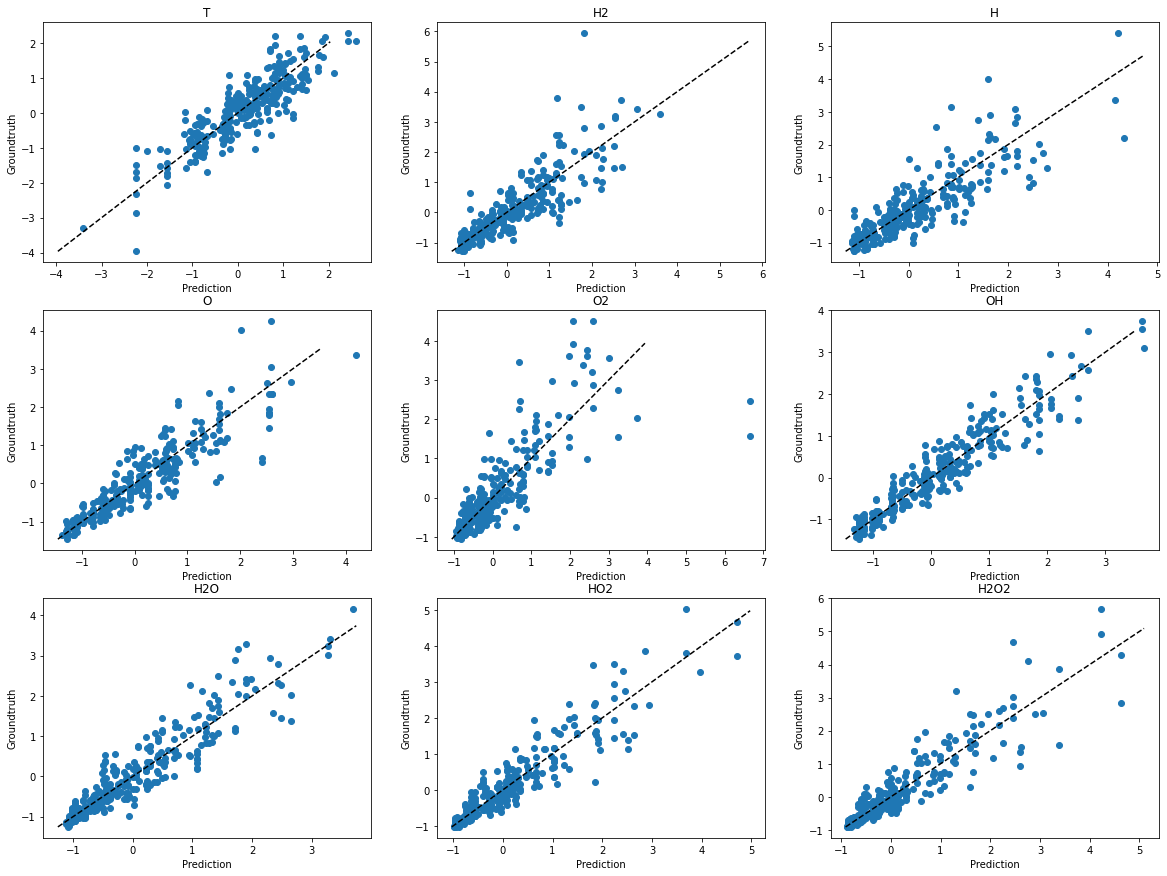

In [107]:
result_plot(y_test, tree_model.predict(X_test))

## Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
parameters = {'n_estimators': range(10,40,10), 'max_depth':range(5,20), 'max_leaf_nodes': range(100, 1000, 20), 'max_features': range(5, 15)}
RF_regr = GridSearchCV(RandomForestRegressor(random_state=42), parameters, n_jobs=-1)
RF_regr.fit(X=X_train, y=y_train)
RF = RF_regr.best_estimator_
print (RF_regr.best_score_, RF_regr.best_params_) 

0.9247978536766783 {'max_depth': 12, 'max_features': 9, 'max_leaf_nodes': 540, 'n_estimators': 30}


In [112]:
RF.score(X_test, y_test)

0.9303740020717903

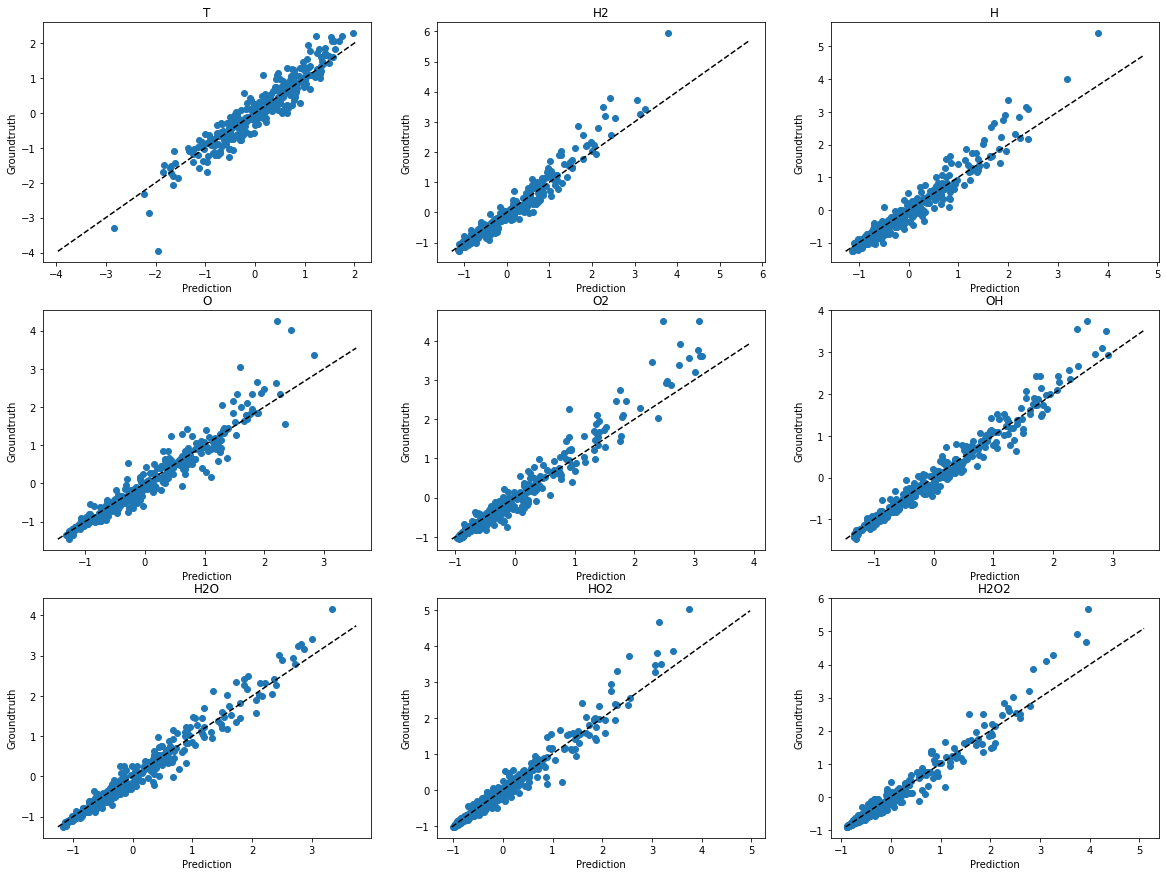

In [113]:
result_plot(y_test, RF.predict(X_test))

## Gradient Boost Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
GB = MultiOutputRegressor(GradientBoostingRegressor(random_state= 42))
GB.fit(X_train, y_train)

print(f'Score on Train data: {GB.score(X_train, y_train)}, \nscore on test data: {GB.score(X_test, y_test)}')

Score on Train data: 0.9923361205675474, 
score on test data: 0.964919521071129


In [39]:
%%timeit
GB.score(X_train, y_train)

15.5 ms ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%time
GB.score(X_train, y_train)

CPU times: user 17.8 ms, sys: 1.19 ms, total: 19 ms
Wall time: 18 ms


0.9923361205675474

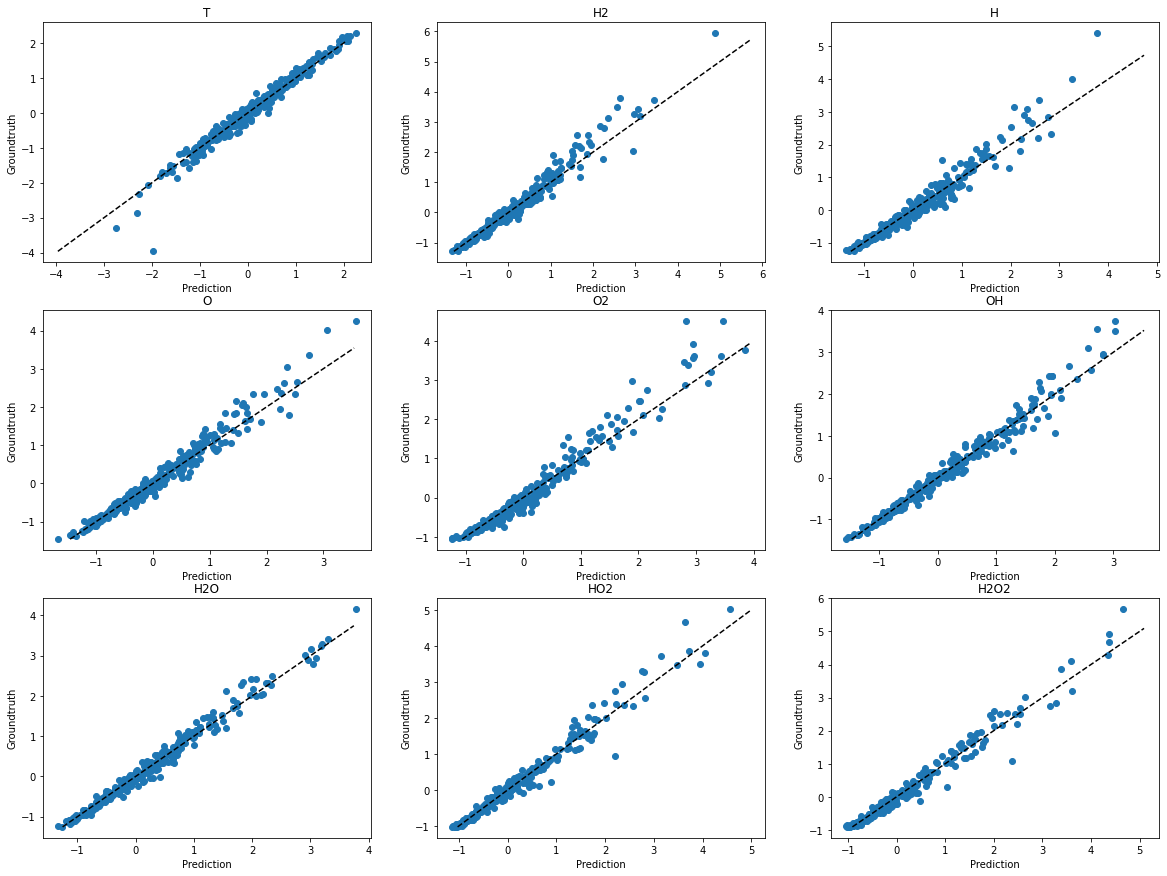

In [147]:
result_plot(y_test, GB.predict(X_test))

In [130]:
GB.get_params()

{'estimator__alpha': 0.9,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'squared_error',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 42,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 1,
 'estimator__warm_start': False,
 'estimator': GradientBoostingRegressor(random_state=42, verbose=1),
 'n_jobs': None}

In [125]:
#grid search
parameters = {'estimator__n_estimators': range(10,40,10), 'estimator__max_depth':range(5,20), 
              'estimator__max_leaf_nodes': range(100, 1000, 20), 'estimator__max_features': range(5, 15)}
GB_regr = GridSearchCV(MultiOutputRegressor(GradientBoostingRegressor(random_state=42)), parameters, n_jobs=-1)
GB_regr.fit(X=X_train, y=y_train)
GB = GB_regr.best_estimator_
print (GB_regr.best_score_, GB_regr.best_params_) 

0.9458842392674681 {'estimator__max_depth': 6, 'estimator__max_features': 8, 'estimator__max_leaf_nodes': 100, 'estimator__n_estimators': 30}


In [128]:
GB.score(X_test, y_test)

0.9497124357867678